In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8, 8)

# Lissajous plot
Lissajous curves are given from the equation:

$x = A \cdot sin(at+\delta)$

$y = B \cdot sin(bt)$

In [231]:
class lissajous():
    def __init__(self, A, B, a, b, delta, t=np.linspace(-12*np.pi, 12*np.pi, 800)):        
        self.t = t
        self.x = A * np.sin(a*t+delta)
        self.y = B * np.sin(b*t)
        self.params = {'A':A, 'B':B, 'a':a, 'b':b, 'delta':delta}
    def plot(self, ax=None, **kwargs):
        if ax==None:
            ax = plt.gca()
        ax.plot(self.x, self.y)
        return ax
    
    def add_harmonic(self, nth_harmonic, relative_amplitude, target='x'):
        if target=='x':
            _A = self.params['A'] * relative_amplitude
            _a = self.params['a'] * nth_harmonic
            self.x += _A * np.sin(_a*t+self.params['delta'])
        elif target=='y':
            _B = self.params['B'] * relative_amplitude
            _b = self.params['b'] * nth_harmonic
            self.y += _B * np.sin(_b*t)

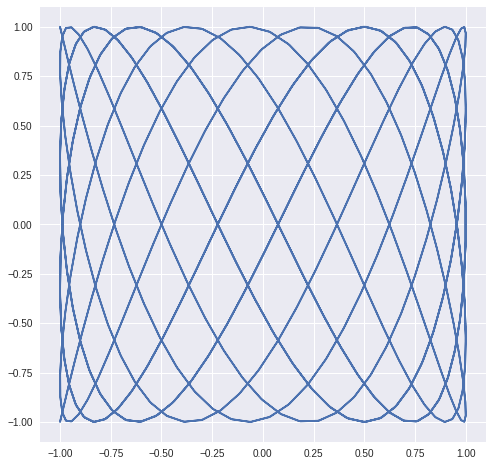

In [232]:
t = np.linspace(-12*np.pi, 12*np.pi, 800)

example1 = lissajous(A=1, B=1, a=1, b=2.1, delta=np.pi/2)
example1.plot()


# Octave
An octave difference in frequencies is the result of the higher frequency being double that of the lower frequency

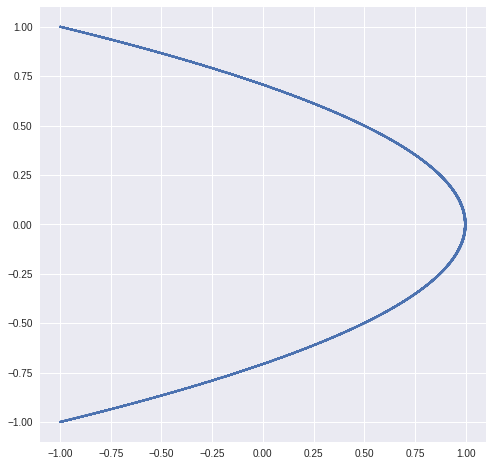

In [201]:
octave = lissajous(A=1, B=1, a=2, b=1, delta=np.pi/2, t=t)
octave.plot()

# Perfect Fifth
A perfect fifth is when the higher frequency is 3/2 times that of the lower

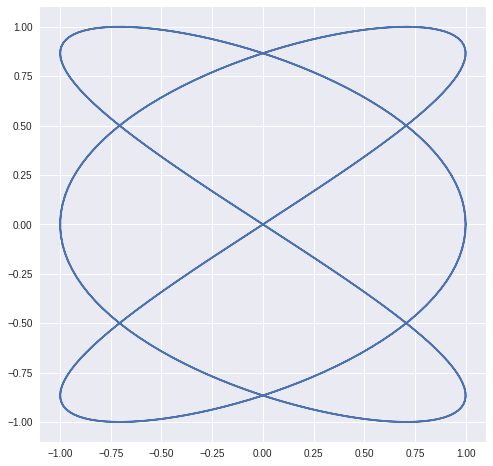

In [188]:
perfect_fifth = lissajous(A=1, B=1, a=1.5, b=1, delta=np.pi/2, t=t)
perfect_fifth.plot()

# Equal Temperament Tuning
Western music uses equal temperament tuning. Each octave is divided into 12 equal portions called semitones:

$EqualTemperamentRatio = \sqrt[12]{2} \approx 1.059$



In [189]:
et_ratio = np.power(2,1/12)

et_fifth_ratio = ET_ratio ** 7

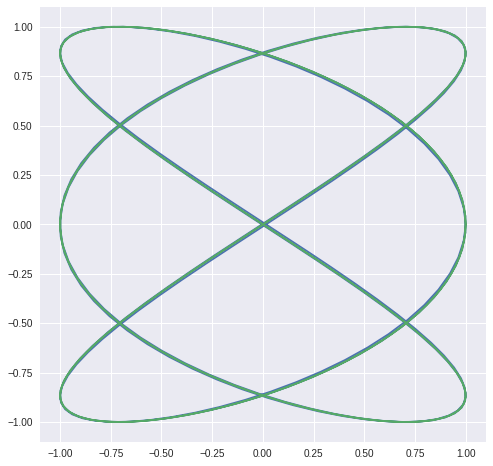

In [190]:
et_fifth = lissajous(A=1, B=1, a=ET_fifth_ratio, b=1, delta=np.pi/2, t=t)
et_fifth.plot(color='red', alpha=0.5)
perfect_fifth.plot()

# Just Tuning - Circle of Fifths

By cycling through a series of perfect fifths (3/2 ratio), we can generate an alternate set of just tuned 12 semitones. 

In [191]:
ratio = 1.5

def within_one_octave(m):
    """
    Given a frequency multiplier x, divide x by 2 until the result is less than 2.
    """
    if m > 2:
        result = m
        while result >= 2:
            result/=2
        return result
    elif m>=1:
        return m
    else:
        raise NotImplementedError('Only multipliers greater than one for now')
        
    

jt_multipliers = [within_one_octave(ratio**x) for x in range(12)]
jt_multipliers = sorted(jt_multipliers)


In [192]:
et_multipliers =  [within_one_octave(et_fifth_ratio**x) for x in range(12)]
et_multipliers = sorted(et_multipliers)


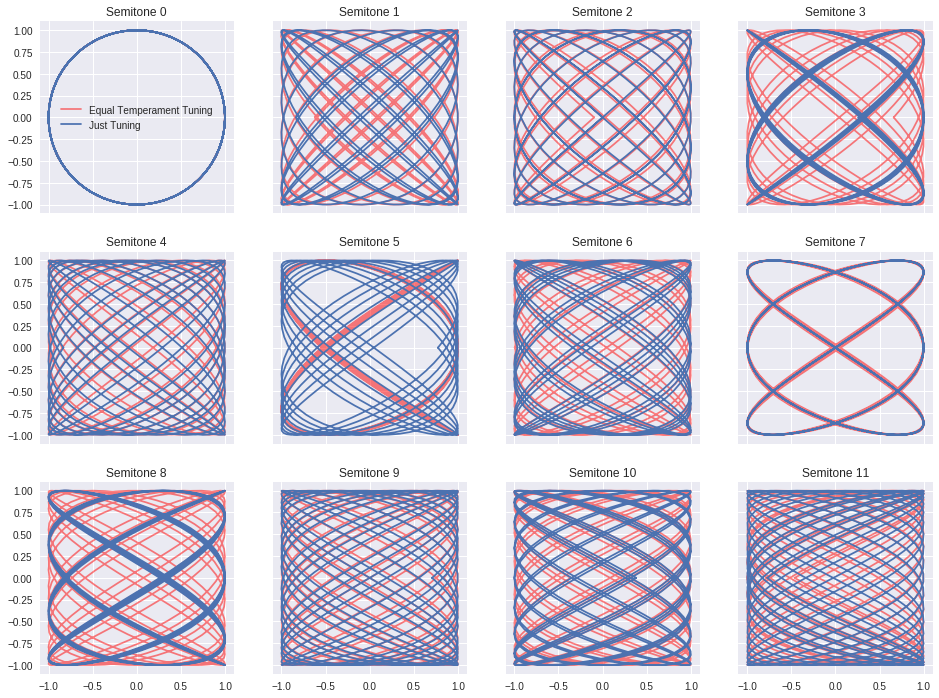

In [203]:
fig, axes = plt.subplots(figsize=(16,12), ncols=4, nrows=3, sharex=True, sharey=True, squeeze=False)
 
for i, ax in enumerate(axes.flat):
    et = lissajous(A=1, B=1, a=et_multipliers[i], b=1, delta=np.pi/2, t=t)
    ax.plot(et.x, et.y, color='red', alpha=0.5)
    
    jt=lissajous(A=1, B=1, a=jt_multipliers[i], b=1, delta=np.pi/2, t=t)
    ax.plot(jt.x, jt.y)
    
    ax.set_title('Semitone {}'.format(i))

axes[0][0].legend(['Equal Temperament Tuning','Just Tuning'])

# Harmonics

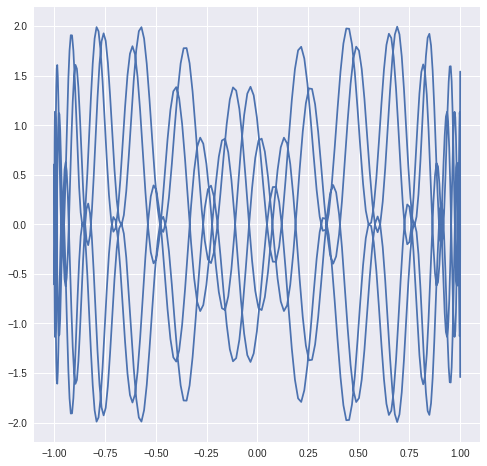

In [247]:
example1 = lissajous(A=1, B=1, a=1, b=2.1, delta=np.pi/2, t=np.linspace(-2*np.pi, 2*np.pi, 800))
example1.add_harmonic(nth_harmonic=2, relative_amplitude=1.003, target='y')
# example1.add_harmonic(nth_harmonic=3, relative_amplitude=1.002, target='y')
# example1.add_harmonic(nth_harmonic=4, relative_amplitude=1.001, target='y')
# example1.add_harmonic(nth_harmonic=5, relative_amplitude=1.0005, target='y')
example1.plot()

(-6.283185307179586, 6.283185307179586)

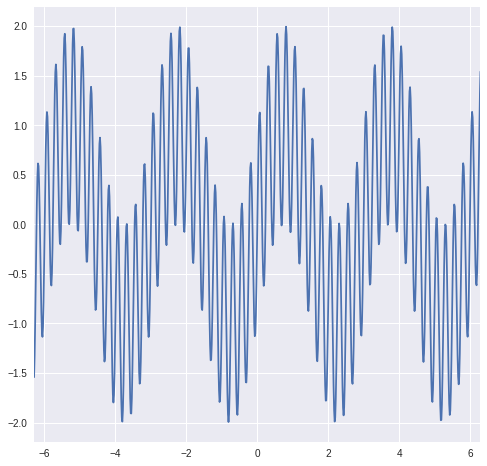

In [248]:
fig, ax = plt.subplots()
ax.plot(example1.t, example1.y)
ax.set_xlim(-2*np.pi, 2*np.pi)